# AML Homework 4

##### Yue Liu

In [1]:
import keras
from tensorflow.python.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from plot_keras_history import plot_history
from tensorflow.keras.layers import Dropout

In [2]:
keras.__version__

'2.7.0'

## Question 1

### (a) Loading Dataset

In [3]:
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

The shape for train_X is: (60000, 28, 28)
The shape for train_Y is: (60000,)
The shape for test_X is: (10000, 28, 28)
The shape for test_Y is: (10000,)


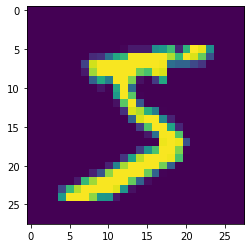

In [4]:
#printing out the shape of train an dtest dataset matrices
print("The shape for train_X is: " + str(train_X.shape))
print("The shape for train_Y is: " + str(train_Y.shape))
print("The shape for test_X is: " + str(test_X.shape))
print("The shape for test_Y is: " + str(test_Y.shape))
#Vsisualize individual images
plt.imshow(train_X[0])

### (b) Preprocessing

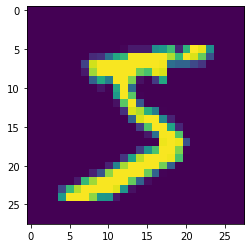

In [5]:
def preprocess(x, y):
    #Scale the pixel values so they lie between 0.0 and 1.0
    x = x.astype("float32") / 255 
    #Reshape the matrix to 28*28*1
    x = np.expand_dims(x, -1)
    y = np.expand_dims(y, -1)
    #One-hot encode output variable
    y = to_categorical(y, 10)
    
    return x, y
    
train_X, train_Y = preprocess(train_X, train_Y)
test_X, test_Y = preprocess(test_X, test_Y)
#Visualize image
plt.imshow(train_X[0])

### (c) Implementation

In [6]:
#Code providedddsdf
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
def create_cnn() :
    # define using Sequential
    model = Sequential()
    # Convolution layer
    model.add(Conv2D(32,(3,3),
              activation = 'relu', 
              kernel_initializer = 'he_uniform',
              input_shape = (28, 28, 1)))
    # Maxpooling layer
    model.add (MaxPooling2D ((2, 2)))
    # Flatten output
    model.add(Flatten())
    # Dense layer of 100 neurons
    model.add(Dense(100, activation = 'relu', kernel_initializer = 'he_uniform'))
    model.add (Dense (10 , activation= 'softmax' ) )
    # initialize optimizer
    opt = SGD(lr=0.01, momentum=0.9)
    # compile model
    model.compile (optimizer=opt, 
                   loss = 'categorical_crossentropy', 
                   metrics =['accuracy'])
    return model

model = create_cnn()
print(model.layers)

[<keras.layers.convolutional.Conv2D object at 0x00000185AA2FA430>, <keras.layers.pooling.MaxPooling2D object at 0x00000185A4E5B280>, <keras.layers.core.flatten.Flatten object at 0x00000185A4E5B250>, <keras.layers.core.dense.Dense object at 0x00000185A4E5B4C0>, <keras.layers.core.dense.Dense object at 0x00000185A4E908B0>]


C:\Users\billy\anaconda3\envs\py36\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


### (d) Training and Evaluating CNN

In [7]:
model.fit(train_X,train_Y,batch_size=32,epochs=10,validation_split=0.1)
score = model.evaluate(test_X,test_Y,verbose =0)
print("The loss and accuracy on test data is: " + str(score))

Epoch 1/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1765 - accuracy: 0.9466 - val_loss: 0.0709 - val_accuracy: 0.9805
Epoch 2/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0597 - accuracy: 0.9810 - val_loss: 0.0538 - val_accuracy: 0.9860
Epoch 3/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0379 - accuracy: 0.9883 - val_loss: 0.0517 - val_accuracy: 0.9850
Epoch 4/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0252 - accuracy: 0.9926 - val_loss: 0.0441 - val_accuracy: 0.9888
Epoch 5/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0186 - accuracy: 0.9946 - val_loss: 0.0508 - val_accuracy: 0.9873
Epoch 6/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0116 - accuracy: 0.9970 - val_loss: 0.0491 - val_accuracy: 0.9893
Epoch 7/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0082 - accuracy: 0.9979 - val_loss: 0.0604 - val_accuracy:

### (e) Experimentation

#### (i)

In [8]:
model2 = create_cnn()
epoch_history = model2.fit(train_X,train_Y,
                          batch_size=32,
                          epochs=50,
                          validation_split=0.1)
# print validation and training accuracy over epochs
print(epoch_history.history['accuracy'])
print(epoch_history.history['val_accuracy'])

Epoch 1/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1782 - accuracy: 0.9459 - val_loss: 0.0755 - val_accuracy: 0.9793
Epoch 2/50
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0569 - accuracy: 0.9831 - val_loss: 0.0551 - val_accuracy: 0.9848
Epoch 3/50
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0366 - accuracy: 0.9885 - val_loss: 0.0543 - val_accuracy: 0.9845
Epoch 4/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0249 - accuracy: 0.9925 - val_loss: 0.0524 - val_accuracy: 0.9862
Epoch 5/50
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0174 - accuracy: 0.9946 - val_loss: 0.0450 - val_accuracy: 0.9885
Epoch 6/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0118 - accuracy: 0.9969 - val_loss: 0.0488 - val_accuracy: 0.9877
Epoch 7/50
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0082 - accuracy: 0.9976 - val_loss: 0.0506 - val_accuracy:

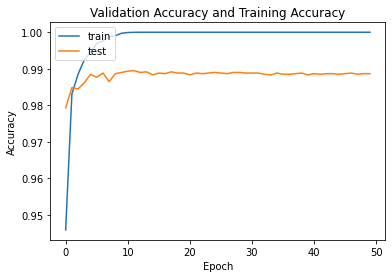

In [9]:
# summarize history for accuracy
plt.plot(epoch_history.history['accuracy'])
plt.plot(epoch_history.history['val_accuracy'])
plt.title('Validation Accuracy and Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


#### (ii)

Epoch 1/50
1688/1688 [==============================] - 8s 5ms/step - loss: 0.2398 - accuracy: 0.9261 - val_loss: 0.0819 - val_accuracy: 0.9772
Epoch 2/50
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0985 - accuracy: 0.9690 - val_loss: 0.0632 - val_accuracy: 0.9833
Epoch 3/50
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0707 - accuracy: 0.9776 - val_loss: 0.0516 - val_accuracy: 0.9863
Epoch 4/50
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0578 - accuracy: 0.9812 - val_loss: 0.0472 - val_accuracy: 0.9878
Epoch 5/50
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0481 - accuracy: 0.9847 - val_loss: 0.0436 - val_accuracy: 0.9878
Epoch 6/50
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0413 - accuracy: 0.9862 - val_loss: 0.0433 - val_accuracy: 0.9883
Epoch 7/50
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0375 - accuracy: 0.9881 - val_loss: 0.0442 - val_accuracy:

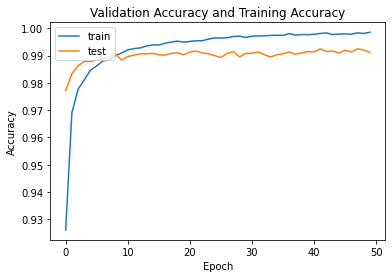

In [10]:
#Function to build model with dropout
def create_cnn_with_dropout():
    # define using Sequential
    model = Sequential()
    # Convolution layer
    model.add(Conv2D(32,(3,3),
              activation = 'relu', 
              kernel_initializer = 'he_uniform',
              input_shape = (28, 28, 1)))
    # Maxpooling layer
    model.add (MaxPooling2D ((2, 2)))
    # Flatten output
    model.add(Flatten())
    # Dropout
    model.add(Dropout(0.5))
    # Dense layer of 100 neurons
    model.add(Dense(100, activation = 'relu', kernel_initializer = 'he_uniform'))
    model.add (Dense (10 , activation= 'softmax' ) )
    # initialize optimizer
    opt = SGD(lr=0.01, momentum=0.9)
    # compile model
    model.compile (optimizer=opt, 
                   loss = 'categorical_crossentropy', 
                   metrics =['accuracy'])
    return model

model3 = create_cnn_with_dropout()

epoch_history = model3.fit(train_X,train_Y,
                          batch_size=32,
                          epochs=50,
                          validation_split=0.1)

plt.plot(epoch_history.history['accuracy'])
plt.plot(epoch_history.history['val_accuracy'])
plt.title('Validation Accuracy and Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### (iii)

In [11]:
def create_cnn_with_dropout_double():
    # define using Sequential
    model = Sequential()
    # Convolution layer
    model.add(Conv2D(32,(3,3),
              activation = 'relu', 
              kernel_initializer = 'he_uniform',
              input_shape = (28, 28, 1)))
    # Maxpooling layer
    model.add (MaxPooling2D ((2, 2)))
    # Convolution layer 2
    model.add(Conv2D(64,(3,3),#64 Output filters
              activation = 'relu', 
              kernel_initializer = 'he_uniform',
              input_shape = (28, 28, 1)))
    # Maxpooling layer 2
    model.add (MaxPooling2D ((2, 2)))
    # Flatten output
    model.add(Flatten())
    # Dropout
    model.add(Dropout(0.5))
    # Dense layer of 100 neurons
    model.add(Dense(100, activation = 'relu', kernel_initializer = 'he_uniform'))
    model.add (Dense (10 , activation= 'softmax' ) )
    # initialize optimizer
    opt = SGD(lr=0.01, momentum=0.9)
    # compile model
    model.compile (optimizer=opt, 
                   loss = 'categorical_crossentropy', 
                   metrics =['accuracy'])
    return model

model4 = create_cnn_with_dropout_double()
epoch_history = model4.fit(train_X,train_Y,
                          batch_size=32,
                          epochs=10,#Train for 10 epoches
                          validation_split=0.1)
score = model4.evaluate(test_X,test_Y,verbose =0)
print("The loss and accuracy for model with Dropout and double convolution layer and maxpooling layer on test data is: " + str(score))

Epoch 1/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.1945 - accuracy: 0.9381 - val_loss: 0.0542 - val_accuracy: 0.9838
Epoch 2/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0836 - accuracy: 0.9741 - val_loss: 0.0447 - val_accuracy: 0.9870
Epoch 3/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0637 - accuracy: 0.9801 - val_loss: 0.0332 - val_accuracy: 0.9912
Epoch 4/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0529 - accuracy: 0.9836 - val_loss: 0.0295 - val_accuracy: 0.9913
Epoch 5/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0470 - accuracy: 0.9849 - val_loss: 0.0339 - val_accuracy: 0.9902
Epoch 6/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0399 - accuracy: 0.9875 - val_loss: 0.0321 - val_accuracy: 0.9907
Epoch 7/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0363 - accuracy: 0.9880 - val_loss: 0.0294 - val_ac

#### (iv)

In [13]:
def create_cnn_with_dropout_double_1E1():
    # define using Sequential
    model = Sequential()
    # Convolution layer
    model.add(Conv2D(32,(3,3),
              activation = 'relu', 
              kernel_initializer = 'he_uniform',
              input_shape = (28, 28, 1)))
    # Maxpooling layer
    model.add (MaxPooling2D ((2, 2)))
    # Convolution layer 2
    model.add(Conv2D(64,(3,3),#64 Output filters
              activation = 'relu', 
              kernel_initializer = 'he_uniform',
              input_shape = (28, 28, 1)))
    # Maxpooling layer 2
    model.add (MaxPooling2D ((2, 2)))
    # Flatten output
    model.add(Flatten())
    # Dropout
    model.add(Dropout(0.5))
    # Dense layer of 100 neurons
    model.add(Dense(100, activation = 'relu', kernel_initializer = 'he_uniform'))
    model.add (Dense (10 , activation= 'softmax' ) )
    # initialize optimizer
    opt = SGD(lr=0.1, momentum=0.9)
    # compile model
    model.compile (optimizer=opt, 
                   loss = 'categorical_crossentropy', 
                   metrics =['accuracy'])
    return model

def create_cnn_with_dropout_double_1E3():
    # define using Sequential
    model = Sequential()
    # Convolution layer
    model.add(Conv2D(32,(3,3),
              activation = 'relu', 
              kernel_initializer = 'he_uniform',
              input_shape = (28, 28, 1)))
    # Maxpooling layer
    model.add (MaxPooling2D ((2, 2)))
    # Convolution layer 2
    model.add(Conv2D(64,(3,3),#64 Output filters
              activation = 'relu', 
              kernel_initializer = 'he_uniform',
              input_shape = (28, 28, 1)))
    # Maxpooling layer 2
    model.add (MaxPooling2D ((2, 2)))
    # Flatten output
    model.add(Flatten())
    # Dropout
    model.add(Dropout(0.5))
    # Dense layer of 100 neurons
    model.add(Dense(100, activation = 'relu', kernel_initializer = 'he_uniform'))
    model.add (Dense (10 , activation= 'softmax' ) )
    # initialize optimizer
    opt = SGD(lr=0.001, momentum=0.9)
    # compile model
    model.compile (optimizer=opt, 
                   loss = 'categorical_crossentropy', 
                   metrics =['accuracy'])
    return model

model5 = create_cnn_with_dropout_double_1E1()
model6 = create_cnn_with_dropout_double_1E3()

epoch_history = model5.fit(train_X,train_Y,
                          batch_size=32,
                          epochs=10,#Train for 10 epoches
                          validation_split=0.1)
score = model5.evaluate(test_X,test_Y,verbose =0)
print("The loss and accuracy for model with Dropout and double convolution layer and maxpooling layer with lr=0.1 on test data is: " + str(score))

epoch_history = model6.fit(train_X,train_Y,
                          batch_size=32,
                          epochs=10,#Train for 10 epoches
                          validation_split=0.1)
score = model6.evaluate(test_X,test_Y,verbose =0)
print("The loss and accuracy for model with Dropout and double convolution layer and maxpooling layer with lr=0.001 on test data is: " + str(score))

Epoch 1/10
1688/1688 [==============================] - 9s 5ms/step - loss: 1.1283 - accuracy: 0.6838 - val_loss: 0.9791 - val_accuracy: 0.6907
Epoch 2/10
1688/1688 [==============================] - 9s 5ms/step - loss: 1.6200 - accuracy: 0.4542 - val_loss: 1.2853 - val_accuracy: 0.6007
Epoch 3/10
1688/1688 [==============================] - 9s 5ms/step - loss: 1.6798 - accuracy: 0.4173 - val_loss: 1.3854 - val_accuracy: 0.5010
Epoch 4/10
1688/1688 [==============================] - 9s 5ms/step - loss: 1.8255 - accuracy: 0.3718 - val_loss: 1.4646 - val_accuracy: 0.5857
Epoch 5/10
1688/1688 [==============================] - 9s 5ms/step - loss: 1.7290 - accuracy: 0.4023 - val_loss: 1.3062 - val_accuracy: 0.5602
Epoch 6/10
1688/1688 [==============================] - 9s 5ms/step - loss: 2.1776 - accuracy: 0.2319 - val_loss: 2.2960 - val_accuracy: 0.1108
Epoch 7/10
1688/1688 [==============================] - 9s 5ms/step - loss: 2.3015 - accuracy: 0.1151 - val_loss: 2.3036 - val_accuracy:

### (f)

#### (i)

#### (ii)

#### (iii)